#Boston data set


In [2]:
#Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import statsmodels as stats
import math
import sys

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
import os
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path)
print("My directory name is : " + folder_name)


My current directory is : c:\Users\mywor\arkadeep\ISLRv2\ch03_linear_regression
My directory name is : ch03_linear_regression


In [4]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1]:
data_location = "C:\\Users\\mywor\\arkadeep\\ISLRv2\\data\\all_data_extracted\\ALL_CSV_FILES_2nd Edition\\"

In [6]:
df_boston = pd.read_csv(filepath_or_buffer= "".join([data_location, "Boston.csv"]), index_col=0)
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [7]:
df_boston.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
# Using scikit-learn
regr = skl_lm.LinearRegression()

X = df_boston.lstat.values.reshape(-1,1)
y = df_boston.medv.values.reshape(-1,1)

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

[34.55384088]
[[-0.95004935]]


<AxesSubplot:>

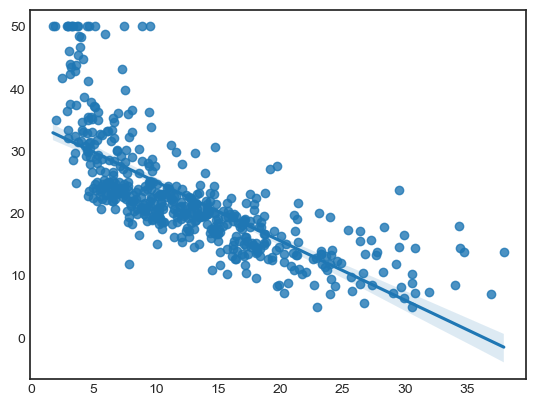

In [9]:
sns.regplot(x=X,y=y)

In [10]:
mean_squared_error(y,regr.predict(X))

38.48296722989414

In [11]:
r2_score(y,regr.predict(X))

0.5441462975864799

In [12]:
#using statsmodels
regr_model=smf.ols('medv ~ lstat', df_boston)
regr_fit = regr_model.fit()
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           5.08e-88
Time:                        21:31:50   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# dir method returns the list of all attributes of the module
dir(regr_fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [14]:
regr_fit.bse

Intercept    0.562627
lstat        0.038733
dtype: float64

In [15]:
regr_fit.HC2_se

Intercept    0.755622
lstat        0.049792
dtype: float64

In [16]:
regr_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.543    
Dependent Variable: medv             AIC:                3286.9750
Date:               2023-01-02 21:31 BIC:                3295.4280
No. Observations:   506              Log-Likelihood:     -1641.5  
Df Model:           1                F-statistic:        601.6    
Df Residuals:       504              Prob (F-statistic): 5.08e-88 
R-squared:          0.544            Scale:              38.636   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     34.5538    0.5626   61.4151  0.0000  33.4485  35.6592
lstat         -0.9500    0.0387  -24.5279  0.0000  -1.0261  -0.8740
------------------------------------------------------------------
Omnibus:             137.043       Durbin-Watson:          0.892  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       291.373
Skew:                1.453         Prob(JB):               0.000  
Kurtosis:            5.319         Condition No.:          30     
==================================================================

"""

In [17]:
# residual standard error
# obtained by square root of regr_fit.scale
regr_fit.scale**.5

6.215760405398069

In [18]:
# square root of (sum of residuals squared/degrees_of_freedom)
np.sqrt(np.sum(regr_fit.resid**2)/regr_fit.df_resid)

6.215760405398068

In [19]:
# mean sq error of model?
regr_fit.mse_model

23243.91399669333

In [20]:
# confidence interval of the coefficients (95%)
regr_fit.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [21]:
# get the fitted values on the training dataset
regr_fit.fittedvalues

1      29.822595
2      25.870390
3      30.725142
4      31.760696
5      29.490078
         ...    
502    25.366864
503    25.927393
504    29.195563
505    28.397521
506    27.067452
Length: 506, dtype: float64

In [22]:
# getting a prediction from the model
regr_fit.predict(pd.DataFrame({'lstat': [5,10,15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [23]:
#prediction = model.get_prediction(exog=dict(x=[5,10,25]))
prediction = regr_fit.get_prediction(exog=dict(lstat=[5,10,25]))

In [24]:
# getting the confidence interval and prediction interval
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,10.802607,0.552329,9.717456,11.887759,-1.457504,23.062718


In [25]:
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,10.802607,0.552329,9.717456,11.887759,-1.457504,23.062718


In [26]:
prediction.table

{'mean': array([29.80359411, 25.05334734, 10.80260704]),
 'mean_se': array([0.40524735, 0.29481378, 0.55232932]),
 'mean_ci_lower': array([29.00741194, 24.47413202,  9.71745557]),
 'mean_ci_upper': array([30.59977628, 25.63256267, 11.8877585 ]),
 'obs_ci_lower': array([17.56567478, 12.82762635, -1.45750378]),
 'obs_ci_upper': array([42.04151344, 37.27906833, 23.06271785])}

eval_env: 1


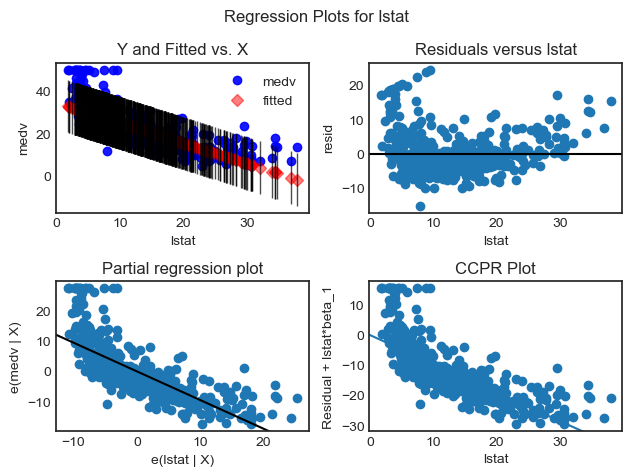

In [27]:
fig = sm.graphics.plot_regress_exog(regr_fit, "lstat")
fig.tight_layout(pad=1.0)

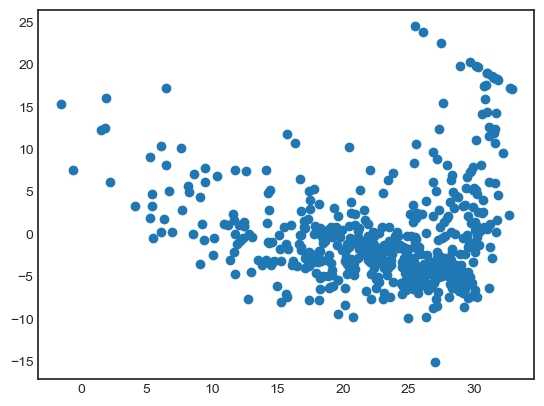

In [28]:
plt.scatter(regr_fit.predict(),regr_fit.resid)

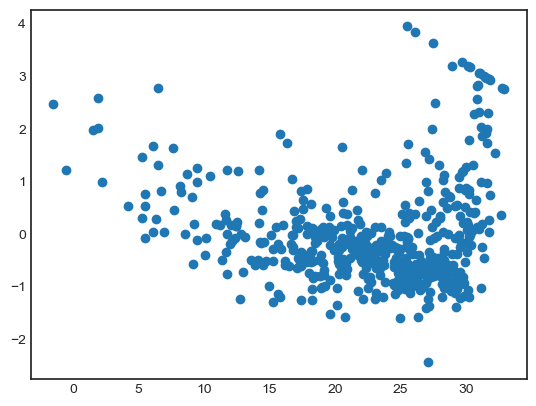

In [29]:
plt.scatter(regr_fit.predict(),regr_fit.resid_pearson)

In [30]:
# getting the studentized residual
regr_fit.outlier_test()

,student_resid,unadj_p,bonf(p)
1,-0.938639,0.348367,1.0
2,-0.687511,0.492078,1.0
3,0.640666,0.522031,1.0
4,0.264236,0.791706,1.0
5,1.081882,0.279823,1.0
...,...,...,...
502,-0.477502,0.633212,1.0
503,-0.857915,0.391348,1.0
504,-0.853387,0.393851,1.0
505,-1.031090,0.302994,1.0


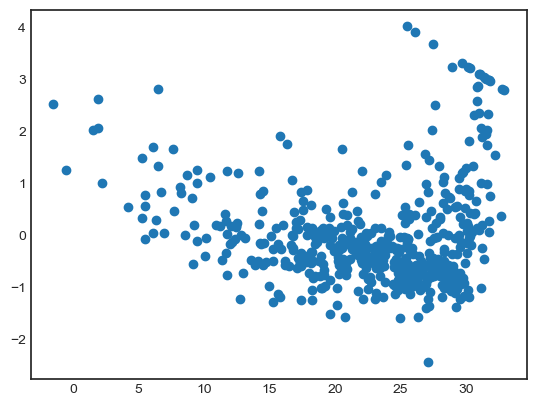

In [31]:
#plot of predicted values and studentized residuals
plt.scatter(regr_fit.predict(),regr_fit.outlier_test()['student_resid'])

In [32]:
regr_fit.resid_pearson

array([-9.36747030e-01, -6.87026125e-01,  6.39480571e-01,  2.63733496e-01,
        1.07950142e+00, -1.45450224e-01,  2.49804654e-02,  1.72780216e+00,
        1.67013134e+00,  9.52422602e-02, -2.01635177e-02, -4.90154986e-01,
        3.33255199e-01, -1.01458757e+00, -1.06283609e+00, -1.06293075e+00,
       -8.36987881e-01, -5.01405565e-01, -5.22504685e-01, -9.06933955e-01,
       -1.58275641e-01, -2.91944702e-01, -2.52409500e-01, -1.87725982e-01,
       -5.57942422e-01, -7.99343238e-01, -6.24800458e-01, -5.36859182e-01,
       -6.42432927e-01, -3.49474478e-01, -6.15733972e-02, -1.23318738e+00,
        7.99906430e-01, -6.46813097e-01, -2.78298536e-01, -1.03886938e+00,
       -5.97477623e-01, -8.40107679e-01, -3.69771212e-02,  5.63683775e-02,
        3.58324114e-01, -5.39853821e-01, -6.00739715e-01, -4.48130801e-01,
       -6.88712124e-01, -8.93508857e-01, -1.78681682e-01, -1.49479746e-02,
        1.46678429e+00,  3.81222306e-02, -3.33937754e-01, -8.19670505e-01,
       -7.30012098e-01, -

In [33]:
regr_fit.resid

1      -5.822595
2      -4.270390
3       3.974858
4       1.639304
5       6.709922
         ...    
502    -2.966864
503    -5.327393
504    -5.295563
505    -6.397521
506   -15.167452
Length: 506, dtype: float64

In [39]:
regr_fit.get_influence().summary_frame()

,dfb_Intercept,dfb_lstat,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1,-0.059716,0.044977,0.001886,-0.938750,0.004263,-0.061420,-0.938639,-0.061413
2,-0.028156,0.015069,0.000582,-0.687871,0.002456,-0.034128,-0.687511,-0.034110
3,0.044083,-0.034510,0.001004,0.641041,0.004864,0.044815,0.640666,0.044789
4,0.019757,-0.016039,0.000198,0.264480,0.005640,0.019918,0.264236,0.019900
5,0.066762,-0.049471,0.002384,1.081699,0.004059,0.069053,1.081882,0.069065
...,...,...,...,...,...,...,...,...
502,-0.018179,0.008887,0.000266,-0.477868,0.002322,-0.023053,-0.477502,-0.023035
503,-0.035414,0.019126,0.000912,-0.858140,0.002472,-0.042719,-0.857915,-0.042708
504,-0.051219,0.037367,0.001421,-0.853618,0.003886,-0.053317,-0.853387,-0.053303
505,-0.057161,0.039732,0.001843,-1.031025,0.003456,-0.060717,-1.031090,-0.060721


In [38]:
regr_fit.get_influence().summary_frame()['hat_diag'].idxmax()

375